## Nama: Jade Wulantrisna Aitken
## NIM: 2702279205

https://drive.google.com/drive/folders/1Hm2Ffu4LxAWX3aixLUB7YuIyaKBL8O7u?usp=sharing

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation



In [89]:
df = pd.read_parquet('dataset_1A.parquet')


#### Lakukan Exploratory Data Analysis (EDA) untuk memahami kondisi data. Jelaskan semua masalah yang anda temukan pada dataset anda. Lakukan pre-processing pada dataset anda sesuai dengan hasil EDA anda, termasuk memisahkan dataset anda menjadi train, val, dan test dengan proporsi 70:10:20.

In [90]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,8,3,Sunday,Yes,24.492063,59.969085,1403.454805,7,On,Off,29.965327,82.05735763545306
1,1,8,Wednesday,No,26.312114,51.408711,1220.547133,8,On,Off,5.986875,83.88917674427188
2,1,19,Sunday,Yes,20.516186,40.918500,1114.230124,8,Off,On,20.489098,66.20209750906106
3,7,3,Wednesday,Yes,20.879426,46.859237,1096.207227,7,Off,On,21.321157,66.43917871187017
4,10,17,Saturday,No,23.015216,48.998158,1999.982252,1,Off,Off,3.966075,76.90227179904673


In [91]:
df.dtypes
# yang perlu diperbaiki -> month, EnergyConsumption

Month                 object
Hour                   int64
DayOfWeek             object
Holiday               object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
EnergyConsumption     object
dtype: object

In [92]:
df.shape 

(1232, 12)

In [93]:
#df['Month']=df['Month'].astype(str).astype(int)
#error

In [94]:
df['Month'].value_counts()

Month
1            189
4            119
10           115
3            100
12            99
6             95
11            93
8             90
7             88
5             84
9             83
2             64
Sep            7
July           4
September      2
Name: count, dtype: int64

In [95]:
df['Month'].replace('Sep', 9, inplace=True)
df['Month'].replace('September', 9, inplace=True)
df['Month'].replace('July', 7, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15628\2042447164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].replace('Sep', 9, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15628\2042447164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [96]:
df['Month'].value_counts()

Month
1     189
4     119
10    115
3     100
12     99
6      95
11     93
8      90
7      88
5      84
9      83
2      64
9       9
7       4
Name: count, dtype: int64

In [97]:
df['Month']=df['Month'].astype(str).astype(int)

In [98]:
df['EnergyConsumption']=df['EnergyConsumption'].astype(str).astype(float)

In [99]:
df.dtypes

Month                  int32
Hour                   int64
DayOfWeek             object
Holiday               object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [100]:
df = df.rename(columns={"DayOfWeek": "Day",
                        "SquareFootage": "SqFoot",
                        "HVACUsage": "HVAC",
                        "LightingUsage": "Lighting",
                        "RenewableEnergy": "REnergy",
                        "EnergyConsumption": "EConsumption"})
df.dtypes

Month             int32
Hour              int64
Day              object
Holiday          object
Temperature     float64
Humidity        float64
SqFoot          float64
Occupancy         int64
HVAC             object
Lighting         object
REnergy         float64
EConsumption    float64
dtype: object

In [101]:
df.head()

,Month,Hour,Day,Holiday,Temperature,Humidity,SqFoot,Occupancy,HVAC,Lighting,REnergy,EConsumption
0,8,3,Sunday,Yes,24.492063,59.969085,1403.454805,7,On,Off,29.965327,82.057358
1,1,8,Wednesday,No,26.312114,51.408711,1220.547133,8,On,Off,5.986875,83.889177
2,1,19,Sunday,Yes,20.516186,40.918500,1114.230124,8,Off,On,20.489098,66.202098
3,7,3,Wednesday,Yes,20.879426,46.859237,1096.207227,7,Off,On,21.321157,66.439179
4,10,17,Saturday,No,23.015216,48.998158,1999.982252,1,Off,Off,3.966075,76.902272


In [102]:
df['Day'].value_counts()

Day
Sunday       192
Saturday     184
Thursday     182
Friday       169
Monday       169
Wednesday    168
Tuesday      168
Name: count, dtype: int64

In [103]:
df['Holiday'].value_counts()

Holiday
No     675
Yes    557
Name: count, dtype: int64

In [104]:
df['HVAC'].value_counts()

HVAC
Off    630
On     602
Name: count, dtype: int64

In [105]:
df['Lighting'].value_counts()

Lighting
On     619
Off    613
Name: count, dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df.isnull().sum()

Month           0
Hour            0
Day             0
Holiday         0
Temperature     0
Humidity        0
SqFoot          0
Occupancy       0
HVAC            0
Lighting        0
REnergy         0
EConsumption    3
dtype: int64

In [108]:
np.mean(df['EConsumption'])

76.63390986210536

In [109]:
df['EConsumption'].fillna(76.63390986210536, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15628\3770269774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EConsumption'].fillna(76.63390986210536, inplace=True)


In [110]:
df.isnull().sum()

Month           0
Hour            0
Day             0
Holiday         0
Temperature     0
Humidity        0
SqFoot          0
Occupancy       0
HVAC            0
Lighting        0
REnergy         0
EConsumption    0
dtype: int64

In [111]:
df.dtypes

Month             int32
Hour              int64
Day              object
Holiday          object
Temperature     float64
Humidity        float64
SqFoot          float64
Occupancy         int64
HVAC             object
Lighting         object
REnergy         float64
EConsumption    float64
dtype: object

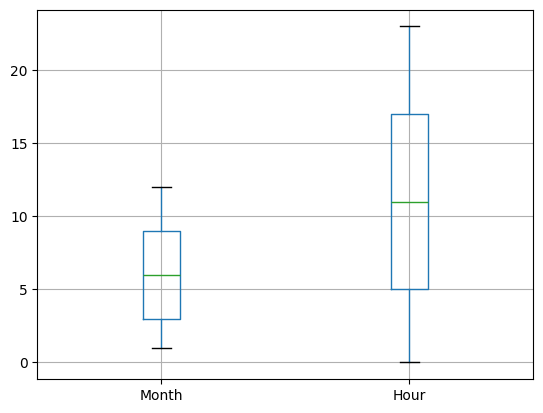

In [112]:
boxplot = df.boxplot(column=['Month','Hour']) 
plt.show()

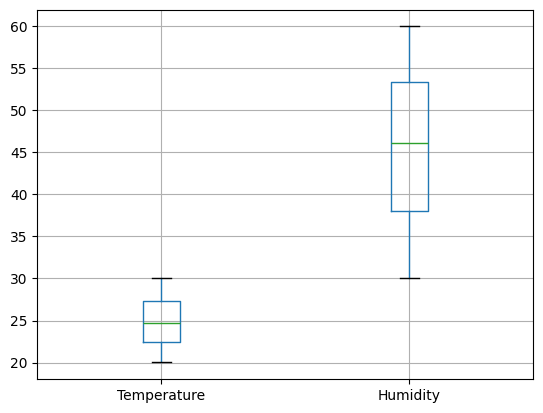

In [113]:
boxplot = df.boxplot(column=['Temperature', 'Humidity']) 
plt.show()

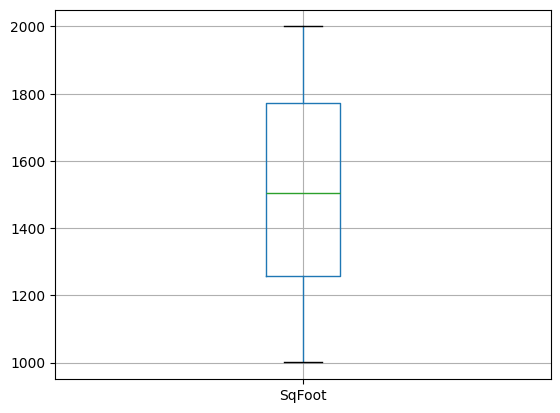

In [114]:
boxplot = df.boxplot(column=['SqFoot']) 
plt.show()

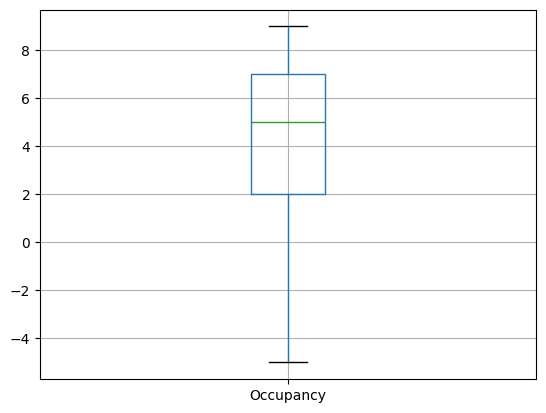

In [115]:
boxplot = df.boxplot(column=['Occupancy']) 
plt.show()

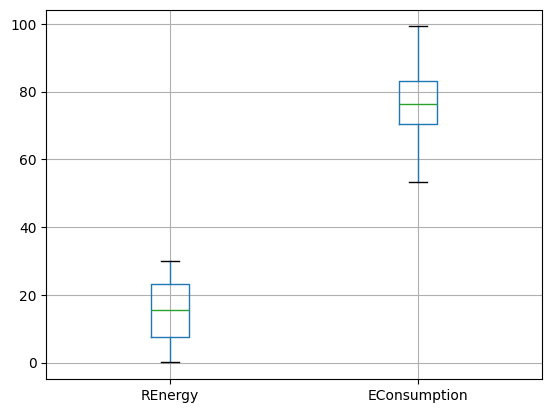

In [116]:
boxplot = df.boxplot(column=['REnergy','EConsumption']) 
plt.show()

In [117]:
#tidak ada outlier

In [118]:
df['Day'].value_counts()

Day
Sunday       192
Saturday     184
Thursday     182
Friday       169
Monday       169
Wednesday    168
Tuesday      168
Name: count, dtype: int64

In [119]:
df['Holiday'].value_counts()

Holiday
No     675
Yes    557
Name: count, dtype: int64

In [120]:
df['HVAC'].value_counts()

HVAC
Off    630
On     602
Name: count, dtype: int64

In [121]:
df['Lighting'].value_counts()

Lighting
On     619
Off    613
Name: count, dtype: int64

In [122]:
df_encode = {
    "Holiday": {"Yes": 1, "No": 0},
    "HVAC": {"On": 1, "Off": 0},
    "Lighting": {"On": 1, "Off": 0},
    "Day": {
        "Monday": 0,
        "Tuesday": 1,
        "Wednesday": 2,
        "Thursday": 3,
        "Friday": 4,
        "Saturday": 5,
        "Sunday": 6
    }
}

df = df.replace(df_encode)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15628\3357116342.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(df_encode)


In [123]:
df.dtypes

Month             int32
Hour              int64
Day               int64
Holiday           int64
Temperature     float64
Humidity        float64
SqFoot          float64
Occupancy         int64
HVAC              int64
Lighting          int64
REnergy         float64
EConsumption    float64
dtype: object

In [124]:
df.head()

,Month,Hour,Day,Holiday,Temperature,Humidity,SqFoot,Occupancy,HVAC,Lighting,REnergy,EConsumption
0,8,3,6,1,24.492063,59.969085,1403.454805,7,1,0,29.965327,82.057358
1,1,8,2,0,26.312114,51.408711,1220.547133,8,1,0,5.986875,83.889177
2,1,19,6,1,20.516186,40.918500,1114.230124,8,0,1,20.489098,66.202098
3,7,3,2,1,20.879426,46.859237,1096.207227,7,0,1,21.321157,66.439179
4,10,17,5,0,23.015216,48.998158,1999.982252,1,0,0,3.966075,76.902272


### Target Variable: Econsumption

In [125]:
#scalling
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['Month', 'Hour', 'Temperature', 'Humidity', 'SqFoot', 'Occupancy', 'REnergy']

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [126]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['EConsumption']) # feature var
y = df['EConsumption'] # target var

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)


## baseline model ANN

In [127]:
print(f"Input feature: {X_train.shape[1] }")
print(f"minimal neuron: {X_train.shape[1] * 2 }")


Input feature: 11
minimal neuron: 22


#### ketentuan:
- minimal 2 hidden layer
- neuronnya harus >= input dimention
- harus pake fungsi aktivasi RelU
- training minimal 10 epoch


### Model 1 -> Sequential Model

In [128]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [129]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input 

sequential = Sequential([  
    Input(shape=(11,)), # input layer
    Dense(76, activation='relu', name="layer1"),  # layer pertama
    Dense(98, activation='relu', name="layer2"),  # layer kedua
    Dense(38, activation='relu', name="layer3"),  # layer ketiga
    Dense(1, name="outputLayer")  # output layer
])

# model complication
sequential.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

sequential.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 76)                912       
                                                                 
 layer2 (Dense)              (None, 98)                7546      
                                                                 
 layer3 (Dense)              (None, 38)                3762      
                                                                 
 outputLayer (Dense)         (None, 1)                 39        
                                                                 
Total params: 12259 (47.89 KB)
Trainable params: 12259 (47.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model 2 -> Functional Model

In [130]:
from tensorflow.keras.models import Model

# input layer
inputlayer = Input(shape=(11,)) 

# hidden layers
x = Dense(83, activation='relu', name='layer1')(inputlayer)   # layer pertama
x = Dense(66, activation='relu', name='layer2')(x)            # layer kedua
x = Dense(40, activation='relu', name='layer3')(x)            # layer ketiga

# output layer
outputlayer = Dense(1, name='outputLayer')(x)  

functional = Model(inputs=inputlayer, outputs=outputlayer)

# model complication
functional.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

functional.summary()  


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 11)]              0         
                                                                 
 layer1 (Dense)              (None, 83)                996       
                                                                 
 layer2 (Dense)              (None, 66)                5544      
                                                                 
 layer3 (Dense)              (None, 40)                2680      
                                                                 
 outputLayer (Dense)         (None, 1)                 41        
                                                                 
Total params: 9261 (36.18 KB)
Trainable params: 9261 (36.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### training (10 epoch)

In [131]:

history_seq = sequential.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),  
                            epochs=10,  
                            batch_size=32,
                            validation_split=0.2)  


history_func = functional.fit(X_train, y_train, 
                              validation_data=(X_val, y_val),  
                              epochs=10,  
                              batch_size=32,
                              validation_split=0.2)  


Epoch 1/10
27/27 [==============================] - 6s 62ms/step - loss: -603.1845 - accuracy: 0.0000e+00 - val_loss: -1173.1846 - val_accuracy: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 0s 16ms/step - loss: -1146.4174 - accuracy: 0.0000e+00 - val_loss: -1173.1846 - val_accuracy: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 0s 11ms/step - loss: -1148.4795 - accuracy: 0.0000e+00 - val_loss: -1173.1846 - val_accuracy: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 0s 14ms/step - loss: -1148.5338 - accuracy: 0.0000e+00 - val_loss: -1173.1846 - val_accuracy: 0.0000e+00
Epoch 5/10
27/27 [==============================] - 0s 9ms/step - loss: -1149.4912 - accuracy: 0.0000e+00 - val_loss: -1173.1846 - val_accuracy: 0.0000e+00
Epoch 6/10
27/27 [==============================] - 0s 8ms/step - loss: -1149.4913 - accuracy: 0.0000e+00 - val_loss: -1173.1846 - val_accuracy: 0.0000e+00
Epoch 7/10
27/27 [==============================] - 0s 6ms/st

### Modifikasi Model

#### bisa ubah:
- jumlah neuron
- jumlah layer
- activation function
- hyper parameter fine-tuning

#### sequential model

In [136]:
sequential_moded = Sequential([  
    Input(shape=(11,)), # input layer
    Dense(88, activation='relu', name="layer1"),  # layer pertama
    Dense(93, activation='tanh', name="layer2"),  # layer kedua
    Dense(45, activation='sigmoid', name="layer3"),  # layer ketiga
    Dense(63, activation='relu', name="layer4"),  # layer keempat
    Dense(1, name="outputLayer")  # output layer
])

# model complication
sequential_moded.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

sequential_moded.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 88)                1056      
                                                                 
 layer2 (Dense)              (None, 93)                8277      
                                                                 
 layer3 (Dense)              (None, 45)                4230      
                                                                 
 layer4 (Dense)              (None, 63)                2898      
                                                                 
 outputLayer (Dense)         (None, 1)                 64        
                                                                 
Total params: 16525 (64.55 KB)
Trainable params: 16525 (64.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Functional model

In [137]:
# input layer
inputlayer = Input(shape=(11,)) 

# hidden layers
x = Dense(32, activation='tanh', name='layer1')(inputlayer)   # layer pertama
x = Dense(48, activation='relu', name='layer2')(x)            # layer kedua
x = Dense(83, activation='tanh', name='layer3')(x)
x = Dense(55, activation='relu', name='layer4')(x)
x = Dense(73, activation='sigmoid', name='layer5')(x)
# output layer
outputlayer = Dense(1, name='outputLayer')(x)  

functional_moded = Model(inputs=inputlayer, outputs=outputlayer)

# model complication
functional_moded.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

functional_moded.summary()  

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 11)]              0         
                                                                 
 layer1 (Dense)              (None, 32)                384       
                                                                 
 layer2 (Dense)              (None, 48)                1584      
                                                                 
 layer3 (Dense)              (None, 83)                4067      
                                                                 
 layer4 (Dense)              (None, 55)                4620      
                                                                 
 layer5 (Dense)              (None, 73)                4088      
                                                                 
 outputLayer (Dense)         (None, 1)                 74 

In [138]:

history_seq_moded = sequential_moded.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),  
                            epochs=10,  
                            batch_size=32,
                            validation_split=0.2)  



history_func_moded = functional_moded.fit(X_train, y_train, 
                              validation_data=(X_val, y_val),  
                              epochs=10,  
                              batch_size=32,
                              validation_split=0.2)  

Epoch 1/10
27/27 [==============================] - 2s 16ms/step - loss: 1178.1615 - accuracy: 0.0000e+00 - val_loss: 1202.1277 - val_accuracy: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 0s 7ms/step - loss: 1178.1615 - accuracy: 0.0000e+00 - val_loss: 1202.1277 - val_accuracy: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 1178.1613 - accuracy: 0.0000e+00 - val_loss: 1202.1277 - val_accuracy: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 0s 4ms/step - loss: 1178.1615 - accuracy: 0.0000e+00 - val_loss: 1202.1277 - val_accuracy: 0.0000e+00
Epoch 5/10
27/27 [==============================] - 0s 8ms/step - loss: 1178.1615 - accuracy: 0.0000e+00 - val_loss: 1202.1277 - val_accuracy: 0.0000e+00
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 1178.1614 - accuracy: 0.0000e+00 - val_loss: 1202.1277 - val_accuracy: 0.0000e+00
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 117

### evaluasi model
#### metrics:
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- R² Score (Coefficient of Determination)


In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi evaluasi
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Prediksi dari keempat model
y_pred_seq = sequential.predict(X_test)
y_pred_func = functional.predict(X_test)
y_pred_seq_mod = sequential_moded.predict(X_test)
y_pred_func_mod = functional_moded.predict(X_test)

# Evaluasi
eval_seq = evaluate_model(y_test, y_pred_seq)
eval_func = evaluate_model(y_test, y_pred_func)
eval_seq_mod = evaluate_model(y_test, y_pred_seq_mod)
eval_func_mod = evaluate_model(y_test, y_pred_func_mod)



results = pd.DataFrame({
    'Model': ['Sequential', 'Functional', 'Sequential Moded', 'Functional Moded'],
    'MAE': [eval_seq[0], eval_func[0], eval_seq_mod[0], eval_func_mod[0]],
    'MSE': [eval_seq[1], eval_func[1], eval_seq_mod[1], eval_func_mod[1]],
    'R2 Score': [eval_seq[2], eval_func[2], eval_seq_mod[2], eval_func_mod[2]]
})

results.head()


8/8 [==============================] - 0s 2ms/step


,Model,MAE,MSE,R2 Score
0,Sequential,73.881596,5536.912062,-67.417132
1,Functional,73.338385,5455.348768,-66.409291
2,Sequential Moded,77.670304,6113.901594,-74.546732
3,Functional Moded,74.857925,5684.179049,-69.236844


#### 1. Model terbaik secara keseluruhan: Functional (original)

- Memiliki nilai MAE dan MSE paling rendah di antara keempat model.

- R² Score juga yang paling mendekati nol, meskipun masih negatif (menandakan model belum baik dalam menjelaskan variasi data).

#### 2. Model Modifikasi (Moded):

- Performa lebih buruk dibanding versi original-nya.

- MAE dan MSE meningkat, dan R² Score menjadi lebih negatif.

- Artinya, penambahan layer dan variasi aktivasi tidak meningkatkan akurasi atau generalisasi model, justru sebaliknya (mungkin karena overfitting atau arsitektur tidak cocok untuk dataset ini).